In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('mymoviedb.csv', lineterminator = '\n')

In [3]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [4]:
df.info()
# Dtype of Release_date id object, need to convert it into datetype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [5]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [6]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [7]:
df.duplicated().sum()

0

In [8]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

In [9]:
df['Release_Date'] = df['Release_Date'].dt.year

In [10]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [11]:
cols = ['Overview', 'Original_Language', 'Poster_Url']
df.drop(cols, axis =1, inplace=True)

In [12]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


In [13]:
def categorize(df, col, labels):
    bin_edge = [df[col].describe()['min'],df[col].describe()['25%'],df[col].describe()['50%'], df[col].describe()['75%'],df[col].describe()['max']]
    df[col] = pd.cut(x= df[col], bins = bin_edge, labels = labels, duplicates = 'drop')
    return df

In [14]:
labels = ['not_popular', 'below_average', 'average', 'popular']
categorize(df, 'Vote_Average', labels)
df['Vote_Average'].unique()

['popular', 'below_average', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_average' < 'average' < 'popular']

In [15]:
df['Vote_Average'].head()

0          popular
1          popular
2    below_average
3          popular
4          average
Name: Vote_Average, dtype: category
Categories (4, object): ['not_popular' < 'below_average' < 'average' < 'popular']

In [16]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_average,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [17]:
df.isna().sum()

Release_Date      0
Title             0
Popularity        0
Vote_Count        0
Vote_Average    100
Genre             0
dtype: int64

In [18]:
df.dropna(inplace = True)

In [19]:
df = df.assign(Genre=df['Genre'].str.split(', ')).explode('Genre').reset_index(drop=True)

df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [20]:
df['Genre'] = df['Genre'].astype('category')

# Data Visualization

In [21]:
sns.set_style('whitegrid')

# 1.what is the most frequent genre of movies released on netflix?

In [22]:
df['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

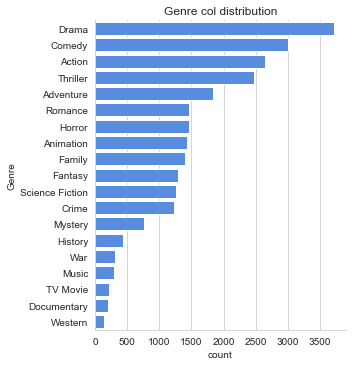

In [23]:
sns.catplot(y = 'Genre', data = df, kind = 'count', order = df['Genre'].value_counts().index, color = '#4287f5')
plt.title("Genre col distribution")
plt.show()

<AxesSubplot:>

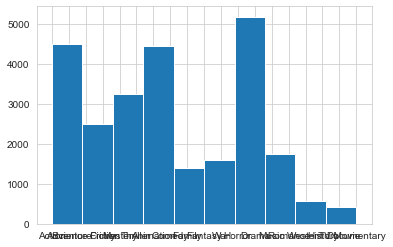

In [24]:
df['Genre'].hist()

# 2. which has the highest vote in vote_avg col?

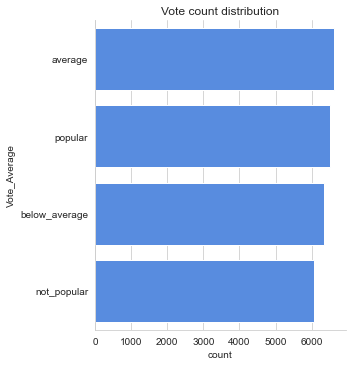

In [25]:
sns.catplot(y='Vote_Average', data = df, kind = 'count', order = df['Vote_Average'].value_counts().index, color = '#4287f5')
plt.title("Vote count distribution")
plt.show()

#  3. Which movie got the highest popularity? what is its genre?

In [26]:
df['Popularity'].describe()

count    25552.000000
mean        41.973711
std        113.758561
min         13.354000
25%         16.363000
50%         21.844000
75%         36.462250
max       5083.954000
Name: Popularity, dtype: float64

In [27]:
df[df['Popularity'] == df['Popularity'].max()]
# Creates a boolean mask (a Series of True/False values), where True indicates rows where the 'Popularity' value is equal to 
# the maximum.
# df[...] (Filtering the DataFrame)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


# 4. Which movie got the lowest popularity? what is its genre?

In [28]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,average,History
25549,1984,Threads,13.354,186,popular,War
25550,1984,Threads,13.354,186,popular,Drama
25551,1984,Threads,13.354,186,popular,Science Fiction


# 5. Which year has most filmmed movie

In [29]:
df[df['Release_Date'] == df['Release_Date'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery
5,2022,The Batman,3827.658,1151,popular,Thriller
6,2022,No Exit,2618.087,122,below_average,Thriller
15,2022,The Commando,1750.484,33,average,Action
...,...,...,...,...,...,...
24892,2022,Chickenhare and the Hamster of Darkness,13.590,5,below_average,Family
24893,2022,Chickenhare and the Hamster of Darkness,13.590,5,below_average,Fantasy
25194,2022,Ted K,13.479,18,below_average,Drama
25195,2022,Ted K,13.479,18,below_average,Crime


<function matplotlib.pyplot.show(close=None, block=None)>

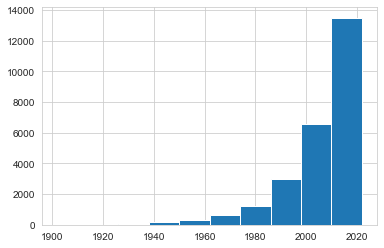

In [30]:
df['Release_Date'].hist()
plt.show

# Q1: What is the most frequent genre in the dataset?
 Drama genre is the most frequent genre in our dataset and has appeared more than 14% of the times among 19 other genres.

# Q2: What genres has highest votes ?
 we have 25.5% of our dataset with popular vote (6520 rows).Drama again gets the highest popularity among fans by being having more than 18.5% of movies popularities.

# Q3: What movie got the highest popularity ? what's its Action , genre ?
 Spider-Man: No Way Home has the highest popularity rate in our dataset and it has genres of Adventure and Science Fiction .

# Q4: Which year has the most filmmed movies? 
 year 2020 has the highest filmming rate in our dataset.

In [31]:
!pip install xgboost

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [33]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [34]:
df = df.assign(Genre=df['Genre'].str.split(', ')).explode('Genre')
df = pd.get_dummies(df, columns=['Genre'])

In [35]:
label_enc = LabelEncoder()
df['Vote_Average'] = label_enc.fit_transform(df['Vote_Average'])

In [36]:
# Define features (X) and target variable (y)
X = df.drop(columns=['Popularity'])  # Independent variables
y = df['Popularity']  # Target variable


In [37]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Ensure both have the same columns
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)
print(X_train.shape, X_test.shape) 


(20441, 8976) (5111, 8976)


In [39]:
# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
# Initialize models
models = {
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

In [41]:
# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'\n{name} Model Performance:')
    print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
    print(f'MSE: {mean_squared_error(y_test, y_pred)}')
    print(f'R2 Score: {r2_score(y_test, y_pred)}')



Decision Tree Model Performance:
MAE: 4.140813148111916
MSE: 468.3794546124046
R2 Score: 0.9256014169580723

Random Forest Model Performance:
MAE: 7.260652570925456
MSE: 816.4265785574189
R2 Score: 0.8703167271657856

XGBoost Model Performance:
MAE: 18.210516136039566
MSE: 1624.608212998721
R2 Score: 0.7419431022109952


In [ ]:
# Initialize Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate performance
print('\nDecision Tree Model Performance:')
print(f'MAE: {mean_absolute_error(y_test, y_pred_dt)}')
print(f'MSE: {mean_squared_error(y_test, y_pred_dt)}')
print(f'R2 Score: {r2_score(y_test, y_pred_dt)}')

In [ ]:
# Initialize Decision Tree model
dt_model = RandomForestRegressor(n_estimators=100, random_state=42),

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate performance
print('\nDecision Tree Model Performance:')
print(f'MAE: {mean_absolute_error(y_test, y_pred_dt)}')
print(f'MSE: {mean_squared_error(y_test, y_pred_dt)}')
print(f'R2 Score: {r2_score(y_test, y_pred_dt)}')

In [ ]:
# Initialize Decision Tree model
dt_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate performance
print('\nDecision Tree Model Performance:')
print(f'MAE: {mean_absolute_error(y_test, y_pred_dt)}')
print(f'MSE: {mean_squared_error(y_test, y_pred_dt)}')
print(f'R2 Score: {r2_score(y_test, y_pred_dt)}')

In [ ]:

# Decision Tree Model Performance:
# MAE: 4.140813148111916
# MSE: 468.3794546124046
# R2 Score: 0.9256014169580723

# Random Forest Model Performance:
# MAE: 7.260652570925456
# MSE: 816.4265785574189
# R2 Score: 0.8703167271657856

# XGBoost Model Performance:
# MAE: 18.210516136039566
# MSE: 1624.608212998721
# R2 Score: 0.7419431022109952